In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

import examples
from qns3vm import QN_S3VM

%matplotlib inline


Dense moons data set instance
Feature dimension:  2
Number of labeled patterns:  5
Number of unlabeled patterns:  495
Number of test patterns:  500
Unique labels:  [-1  1]
Time needed to compute the model:  0.5640308856964111  seconds
Classification error of QN-S3VM:  0.0


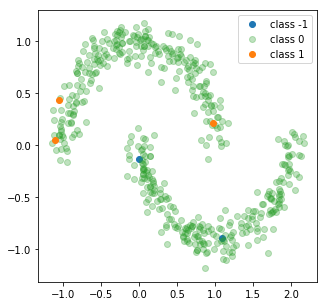

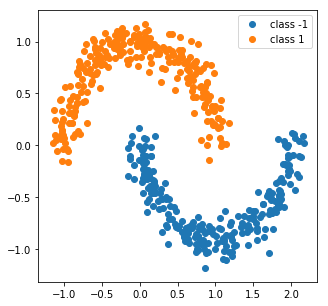

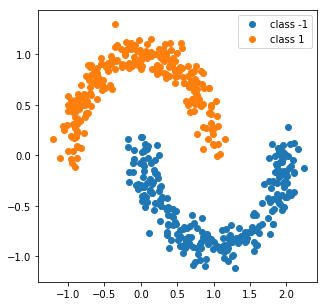

In [2]:
def disp(X,y):
    color = {-1:"tab:blue", 1:"tab:orange", 0:"tab:green"}
    plt.figure(figsize=(5,5))
    cls_list = np.unique(y)
    for v in cls_list:
        idx = (y==v)
        plt.scatter(X[idx,0],X[idx,1],color=color[v],label='class %d'%(v),alpha=1-0.7*(v==0))
    plt.legend()
    plt.show()
    return

def s3vm_moon():
    my_random_generator = random.Random()
    my_random_generator.seed(0)
    # dense moons data set
    X_train_l, L_train_l, X_train_u, X_test, L_test = examples.get_moons_data(my_random_generator)
    print("Unique labels: ",np.unique(L_test))
    t_start = time.time()
    # the parameter estimate_r for the balance ratio has to be provided explicitly, since the estimation
    # is bad due to only 5 labeled patterns in the training set.
    model = QN_S3VM(X_train_l, L_train_l, X_train_u, my_random_generator, lam=0.0009765625, lamU=1, \
                    kernel_type="RBF", sigma=0.5,  estimate_r=0.0,)
    preds_train = model.train()
    t_end = time.time()
    elapsed_time = t_end - t_start
    preds = model.getPredictions(X_test)
    error = examples.classification_error(preds,L_test)
    print("Time needed to compute the model: ", elapsed_time, " seconds")
    print("Classification error of QN-S3VM: ", error) 
    
    X_draw = np.concatenate((X_train_l,X_train_u),axis=0)
    y_draw = np.hstack((L_train_l,np.zeros(len(X_train_u))))
    disp(X_draw,y_draw)
    disp(X_draw,preds_train) 
    disp(np.array(X_test),np.array(preds))
    return

s3vm_moon()